In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
import platform
platform.system()

if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [5]:
heal = pd.read_csv('healcount.csv')
heal

,시도,종별,진료형태,진료실인원,진료건수
0,전국,0,계,1610236,81573263
1,전국,0,입원,475529,2683135
2,전국,0,외래,1554008,52653258
3,전국,0,약국,1465375,26236870
4,서울,0,계,266835,13694562
5,서울,0,입원,67526,320574
6,서울,0,외래,259548,9068495
7,서울,0,약국,245206,4305493
8,부산,0,계,148687,8145134
9,부산,0,입원,47105,290137


In [6]:
healcount = heal['진료형태'] == '계'
heal = heal[healcount]
healcount = heal['시도'] != '전국'
heal = heal[healcount]
heal = heal.groupby(['시도']).sum()
del heal['종별']
#heal.to_csv('heal.csv', encoding = 'CP949')
heal

,진료실인원,진료건수
시도,,
강원,129213,5652890
경기,523222,24783488
경남,205710,10014392
경북,261801,10521864
광주,144979,6664592
대구,214905,11601942
대전,108027,5792736
부산,304768,16290268
서울,545452,27389124


In [19]:
heal = pd.read_csv('heal.csv', encoding = 'CP949')
heal = heal.sort_values(by = '구분')
heal

,통계시도명,진료실인원,진료건수,인구수,진료실인원/인구수,진료건수/인구수,구분
0,강원도,129213,5652890,1542840,8.375010,3.663951,도
14,제주특별자치도,45028,2125646,674635,6.674424,3.150809,도
13,전라북도,194284,10143696,1804104,10.769002,5.622567,도
12,전라남도,167832,8430088,1851549,9.064410,4.552992,도
15,충청남도,126899,6185056,2121029,5.982898,2.916064,도
16,충청북도,109577,5089596,1600837,6.844982,3.179334,도
3,경상북도,261801,10521864,2639422,9.918876,3.986427,도
2,경상남도,205710,10014392,3340216,6.158584,2.998127,도
1,경기도,523222,24783488,13427014,3.896786,1.845793,도
6,대전광역시,108027,5792736,1463882,7.379488,3.957106,시


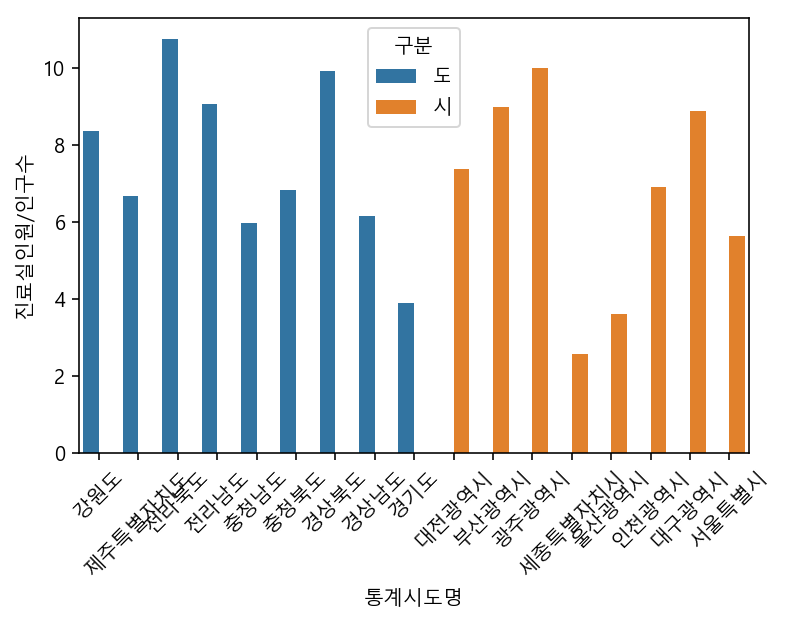

In [20]:
plt.xticks(rotation = 45 )
sns.barplot(
    data = heal,
    x = '통계시도명',
    y = '진료실인원/인구수',
    hue = '구분'
)

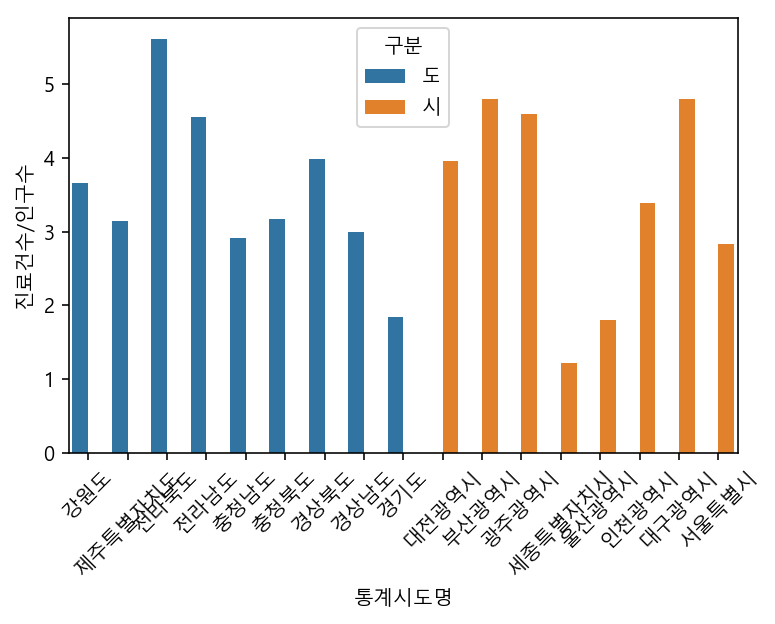

In [22]:
plt.xticks(rotation = 45 )
sns.barplot(
    data = heal,
    x = '통계시도명',
    y = '진료건수/인구수',
    hue = '구분'

)